<a href="https://colab.research.google.com/github/Sanjivkumar100/Smart_Cricket-Predictor/blob/main/DL_Project_Cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

In [ ]:
!pip install tensorflow

In [ ]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


player_stat=pd.read_csv('/content/drive/MyDrive/player_stats.csv')
np.random.seed(42)
# Convert 'experience_level' to numeric, coercing errors to NaN, then fill NaN with 1

# Now perform the calculation
player_stat['future_runs'] = player_stat['runs']* np.random.uniform(0.8, 1.2, len(player_stat))
player_stat['future_batting_avg'] = player_stat['batting_avg'] * np.random.uniform(0.9, 1.1, len(player_stat))
player_stat['future_bowling_avg'] = player_stat['bowling_avg'] * np.random.uniform(0.9, 1.1, len(player_stat))
player_stat['future_economy'] = player_stat['economy']* np.random.uniform(0.8, 1.2, len(player_stat))

player_stat['future_runs'] = player_stat['future_runs'].clip(lower=0)
player_stat['future_batting_avg'] = player_stat['future_batting_avg'].clip(lower=0)
player_stat['future_bowling_avg'] = player_stat['future_bowling_avg'].clip(lower=0)
player_stat['future_economy'] = player_stat['future_economy'].clip(lower=0)
player_stat

,players,matches_played_x,runs,balls_faced,fours,sixes,dismissals,matches_played_y,balls_bowled,runs_given,...,experience_level,batting_avg,strike_rate,economy,bowling_avg,role,future_runs,future_batting_avg,future_bowling_avg,future_economy
0,TD Paine,2,15,29,0,0,2,0,0,0,...,Beginner,7.500000,51.724138,0.000000,0.000000,Batsman,14.247241,7.747796,0.000000,0.000000
1,RR Sarwan,4,77,78,6,1,3,0,0,0,...,Beginner,19.250000,98.717949,0.000000,0.000000,Batsman,90.882001,19.338802,0.000000,0.000000
2,A Kumble,15,42,49,3,0,2,42,983,1089,...,Experienced,2.800000,85.714286,6.646999,22.224490,Bowler,45.897498,2.720945,24.345480,6.771027
3,SN Khan,36,606,456,63,14,29,1,2,6,...,Experienced,16.833333,132.894737,18.000000,inf,Batsman,629.914817,18.103242,inf,17.138884
4,P Simran Singh,34,782,528,78,41,35,0,0,0,...,Experienced,23.000000,148.106061,0.000000,0.000000,Batsman,674.402631,22.505247,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,R McLaren,13,172,178,14,1,8,18,372,558,...,Experienced,13.230769,96.629213,9.000000,39.857143,Batsman,192.314391,13.651205,43.103069,7.853810
728,RN ten Doeschate,21,338,238,26,15,17,10,83,94,...,Experienced,16.095238,142.016807,6.795181,31.333333,Batsman,297.660014,15.753583,32.403256,6.444389
729,K Yadav,1,0,4,0,0,0,3,54,85,...,Beginner,0.000000,0.000000,9.444444,42.500000,Bowler,0.000000,0.000000,43.013745,10.962885
730,RS Hangargekar,0,0,0,0,0,0,2,43,60,...,Beginner,0.000000,0.000000,8.372093,20.000000,Bowler,0.000000,0.000000,18.443958,9.399160


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
features1=player_stat[['runs','balls_faced','batting_avg','strike_rate','balls_bowled','economy','bowling_avg','wickets']]
target1='role'

X1=player_stat[features1.columns]
X1.replace([np.inf,-np.inf],np.nan,inplace=True)
X1.fillna(0,inplace=True)

le1=LabelEncoder()
y1=le1.fit_transform(player_stat[target1])

<ipython-input-3-4a9519d8ce63>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.replace([np.inf,-np.inf],np.nan,inplace=True)
<ipython-input-3-4a9519d8ce63>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.fillna(0,inplace=True)


In [ ]:
import pickle as pkl
with open('/content/drive/MyDrive/le_role_prediction.pkl','wb') as f:
  pkl.dump(le1,f)

In [ ]:
scaler1=StandardScaler()
X_scaled1=scaler1.fit_transform(X1)

smote1 = SMOTE(random_state=42)
X_train_sm1, y_train_sm1 = smote1.fit_resample(X_scaled1, y1)
X_train1,X_test1,y_train1,y_test1=train_test_split(X_train_sm1,y_train_sm1,test_size=0.3,random_state=42)

In [ ]:
import pickle as pkl
with open('/content/drive/MyDrive/scaler_role_prediction.pkl','wb') as f:
  pkl.dump(scaler1,f)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
features2=player_stat[['runs','balls_faced','batting_avg','strike_rate']]
target2='future_runs'

X2=player_stat[features2.columns]
X2.replace([np.inf,-np.inf],np.nan,inplace=True)
X2.fillna(0,inplace=True)

y2 = player_stat[target2].values

<ipython-input-52-18b8e11b89c9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2.replace([np.inf,-np.inf],np.nan,inplace=True)
<ipython-input-52-18b8e11b89c9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2.fillna(0,inplace=True)


In [ ]:
scaler2=StandardScaler()
X_scaled2=scaler2.fit_transform(X2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X_scaled2,y2,test_size=0.3,random_state=42)

In [ ]:
import pickle as pkl
with open('/content/drive/MyDrive/scaler_runs.pkl','wb') as f:
  pkl.dump(scaler2,f)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
features3=player_stat[['runs','balls_faced','batting_avg']]
target3='future_batting_avg'

X3=player_stat[features3.columns]
X3.replace([np.inf,-np.inf],np.nan,inplace=True)
X3.fillna(0,inplace=True)

y3 = player_stat[target3].values

<ipython-input-30-b07a55bc2f43>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3.replace([np.inf,-np.inf],np.nan,inplace=True)
<ipython-input-30-b07a55bc2f43>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3.fillna(0,inplace=True)


In [ ]:
scaler3=StandardScaler()
X_scaled3=scaler3.fit_transform(X3)
X_train3,X_test3,y_train3,y_test3=train_test_split(X_scaled3,y3,test_size=0.3,random_state=42)

In [ ]:
import pickle as pkl
with open('/content/drive/MyDrive/scaler_batting_avg.pkl','wb') as f:
  pkl.dump(scaler3,f)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr=LinearRegression()
lr.fit(X_train3,y_train3)
y_predlr=lr.predict(X_test3)
mse=mean_squared_error(y_test3,y_predlr)
r2=r2_score(y_test3,y_predlr)
print("Linear Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train3, y_train3)
y_predrfr = rfr.predict(X_test3)
mse = mean_squared_error(y_test3, y_predrfr)  # Fixed
r2 = r2_score(y_test3, y_predrfr)             # Fixed
print("Random Forest Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


gbr=GradientBoostingRegressor(n_estimators=100,random_state=42)
gbr.fit(X_train3,y_train3)
y_predgbr=gbr.predict(X_test3)
mse=mean_squared_error(y_test3,y_predgbr)
r2=r2_score(y_test3,y_predgbr)
print("Gradient Boosting Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

drt=DecisionTreeRegressor(random_state=42)
drt.fit(X_train3,y_train3)
y_preddrt=drt.predict(X_test3)
mse=mean_squared_error(y_test3,y_preddrt)
r2=r2_score(y_test3,y_preddrt)
print("Decision Tree Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Linear Regression
Mean Squared Error: 0.8449696919813985
R-squared: 0.9923767502636994
Random Forest Regression
Mean Squared Error: 1.1899914257589645
R-squared: 0.9892639914677358
Gradient Boosting Regression
Mean Squared Error: 1.3828613030010175
R-squared: 0.987523934688447
Decision Tree Regression
Mean Squared Error: 1.8233268524918984
R-squared: 0.9835500893353291


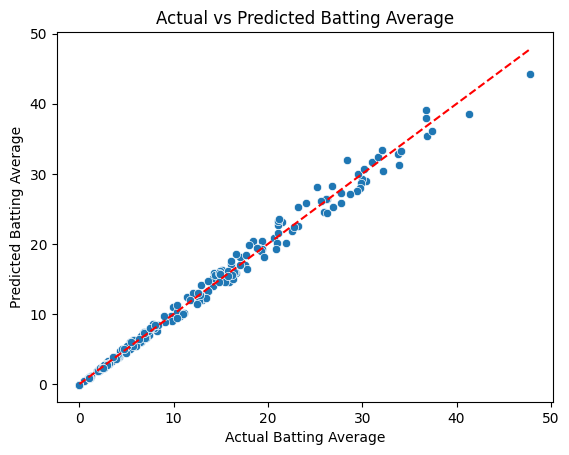

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

actual = y_test3
predicted = y_predlr

sns.scatterplot(x=actual, y=predicted)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
plt.xlabel('Actual Batting Average')
plt.ylabel('Predicted Batting Average')
plt.title('Actual vs Predicted Batting Average')
plt.show()


In [ ]:
import pickle as pkl
with open('/content/drive/MyDrive/model_batting_avg.pkl','wb') as f:
  pkl.dump(lr,f)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features4=player_stat[['wickets','balls_bowled','bowling_avg']]
target4='future_bowling_avg'

X4=player_stat[features4.columns]
X4.replace([np.inf,-np.inf],np.nan,inplace=True)
X4.fillna(0,inplace=True)

y4 = player_stat[target4].values

<ipython-input-6-ee054c63fff5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4.replace([np.inf,-np.inf],np.nan,inplace=True)
<ipython-input-6-ee054c63fff5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4.fillna(0,inplace=True)


In [ ]:
# Handle invalid values in target
y4 = np.nan_to_num(y4, nan=0.0, posinf=0.0, neginf=0.0)

# Optional: check for remaining issues
print("NaNs:", np.isnan(y4).sum(), "Infs:", np.isinf(y4).sum())
print("Max y4:", np.max(y4), "Min y4:", np.min(y4))


NaNs: 0 Infs: 0
Max y4: 139.56947394279373 Min y4: 0.0


In [ ]:
scaler4=StandardScaler()
X_scaled4=scaler4.fit_transform(X4)
X_train4,X_test4,y_train4,y_test4=train_test_split(X_scaled4,y4,test_size=0.3,random_state=42)

In [ ]:
import pickle as pkl
with open('/content/drive/MyDrive/scaler_bowling_avg.pkl','wb') as f:
  pkl.dump(scaler4,f)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

bowl_lr=LinearRegression()
bowl_lr.fit(X_train4,y_train4)
y_predlr=bowl_lr.predict(X_test4)
mse=mean_squared_error(y_test4,y_predlr)
r2=r2_score(y_test4,y_predlr)
print("Linear Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")

bowl_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
bowl_rfr.fit(X_train4, y_train4)
y_predrfr = bowl_rfr.predict(X_test4)
mse = mean_squared_error(y_test4, y_predrfr)
r2 = r2_score(y_test4, y_predrfr)
print("Random Forest Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")


bowl_gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
bowl_gbr.fit(X_train4, y_train4)
y_predgbr = bowl_gbr.predict(X_test4)
mse = mean_squared_error(y_test4, y_predgbr)
r2 = r2_score(y_test4, y_predgbr)
print("Random Forest Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")


bowl_drt = DecisionTreeRegressor(random_state=42)
bowl_drt.fit(X_train4, y_train4)
y_preddrt = bowl_drt.predict(X_test4)
mse = mean_squared_error(y_test4, y_preddrt)
r2 = r2_score(y_test4, y_predgbr)
print("Random Forest Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")

Linear Regression
Mean Squared Error: 4.338296596689822
R-squared: 0.9930118134475868

Random Forest Regression
Mean Squared Error: 14.821797156386186
R-squared: 0.9761248496357107

Random Forest Regression
Mean Squared Error: 13.239555361876178
R-squared: 0.978673546015644

Random Forest Regression
Mean Squared Error: 14.88614631088097
R-squared: 0.978673546015644



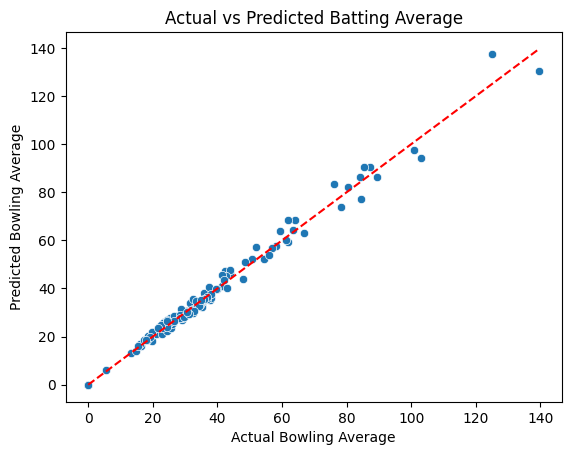

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

actual = y_test4
predicted = y_predlr

sns.scatterplot(x=actual, y=predicted)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
plt.xlabel('Actual Bowling Average')
plt.ylabel('Predicted Bowling Average')
plt.title('Actual vs Predicted Batting Average')
plt.show()


In [ ]:
import pickle as pkl

with open('/content/drive/MyDrive/model_bowling_avg.pkl','wb') as f:
  pkl.dump(bowl_lr,f)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


features5=player_stat[['wickets','balls_bowled','economy']]
target5='future_economy'

X5=player_stat[features5.columns]
X5.replace([np.inf,-np.inf],np.nan,inplace=True)
X5.fillna(0,inplace=True)

y5 = player_stat[target5].values
print("NaNs:", np.isnan(y5).sum(), "Infs:", np.isinf(y5).sum())
print("Max y4:", np.max(y5), "Min y4:", np.min(y5))

NaNs: 0 Infs: 0
Max y4: 29.139767490895622 Min y4: 0.0


<ipython-input-25-63828cbcffb8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5.replace([np.inf,-np.inf],np.nan,inplace=True)
<ipython-input-25-63828cbcffb8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5.fillna(0,inplace=True)


In [ ]:
scaler5=StandardScaler()
X_scaled5=scaler5.fit_transform(X5)
X_train5,X_test5,y_train5,y_test5=train_test_split(X_scaled5,y5,test_size=0.3,random_state=42)

In [ ]:
import pickle as pkl
with open('/content/drive/MyDrive/scaler_economy.pkl','wb') as f:
  pkl.dump(scaler5,f)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

eco_lr = LinearRegression()
eco_lr.fit(X_train5, y_train5)
y_predlr = eco_lr.predict(X_test5)

mse=mean_squared_error(y_test5,y_predlr)
r2=r2_score(y_test5,y_predlr)
print("Linear Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")

eco_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
eco_rfr.fit(X_train5, y_train5)
y_predrfr = eco_rfr.predict(X_test5)
mse = mean_squared_error(y_test5, y_predrfr)
r2 = r2_score(y_test5, y_predrfr)
print("Random Forest Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")


eco_gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
eco_gbr.fit(X_train5, y_train5)
y_predgbr = eco_gbr.predict(X_test5)
mse = mean_squared_error(y_test5, y_predgbr)
r2 = r2_score(y_test5, y_predgbr)
print("Random Forest Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")

eco_drt = DecisionTreeRegressor(random_state=42)
eco_drt.fit(X_train5, y_train5)
y_preddrt = eco_drt.predict(X_test5)
mse = mean_squared_error(y_test5, y_preddrt)
r2 = r2_score(y_test5, y_predgbr)
print("Random Forest Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")

Linear Regression
Mean Squared Error: 0.9419224600714463
R-squared: 0.9585794057954377

Random Forest Regression
Mean Squared Error: 1.2979104686447112
R-squared: 0.9429250016699802

Random Forest Regression
Mean Squared Error: 1.0864514934658216
R-squared: 0.9522238099828567

Random Forest Regression
Mean Squared Error: 1.7309529353403517
R-squared: 0.9522238099828567



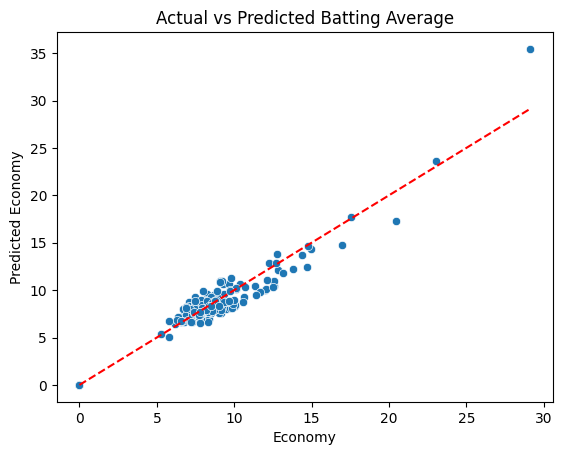

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

actual = y_test5
predicted = y_predlr

sns.scatterplot(x=actual, y=predicted)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
plt.xlabel('Economy')
plt.ylabel('Predicted Economy')
plt.title('Actual vs Predicted Batting Average')
plt.show()


In [ ]:
import pickle as pkl
with open('/content/drive/MyDrive/model_economy.pkl','wb') as f:
  pkl.dump(eco_lr,f)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE

# After train-test split


model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train_sm1.shape[1],)),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dense(4,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True,verbose=1)
history=model.fit(X_train_sm1,y_train_sm1,epochs=150, validation_data=(X_test1,y_test1),batch_size=32,callbacks=[early_stopping],verbose=1)

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4729 - loss: 1.2358 - val_accuracy: 0.7302 - val_loss: 0.8036
Epoch 2/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7159 - loss: 0.8181 - val_accuracy: 0.8005 - val_loss: 0.5789
Epoch 3/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7783 - loss: 0.6068 - val_accuracy: 0.8277 - val_loss: 0.4758
Epoch 4/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7790 - loss: 0.5418 - val_accuracy: 0.8299 - val_loss: 0.4233
Epoch 5/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8034 - loss: 0.4936 - val_accuracy: 0.8254 - val_loss: 0.4016
Epoch 6/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8190 - loss: 0.4742 - val_accuracy: 0.8367 - val_loss: 0.3809
Epoch 7/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8113 - loss: 0.4647 - val_accuracy: 0.8435 - val_loss: 0.3599
Epoch 8/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8051 - loss: 0.4750 - val_accuracy: 0.8435 - val_loss: 0.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

runs_lr=LinearRegression()
runs_lr.fit(X_train2,y_train2)
y_predlr=runs_lr.predict(X_test2)
mse=mean_squared_error(y_test2,y_predlr)
r2=r2_score(y_test2,y_predlr)
print("Linear Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train2, y_train2)
y_predrfr = rfr.predict(X_test2)
mse = mean_squared_error(y_test2, y_predrfr)  # Fixed
r2 = r2_score(y_test2, y_predrfr)             # Fixed
print("Random Forest Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


gbr=GradientBoostingRegressor(n_estimators=100,random_state=42)
gbr.fit(X_train2,y_train2)
y_predgbr=gbr.predict(X_test2)
mse=mean_squared_error(y_test2,y_predgbr)
r2=r2_score(y_test2,y_predgbr)
print("Gradient Boosting Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

drt=DecisionTreeRegressor(random_state=42)
drt.fit(X_train2,y_train2)
y_preddrt=drt.predict(X_test2)
mse=mean_squared_error(y_test2,y_preddrt)
r2=r2_score(y_test2,y_preddrt)
print("Decision Tree Regression")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Linear Regression
Mean Squared Error: 23130.747788528504
R-squared: 0.9759717096973948
Random Forest Regression
Mean Squared Error: 31631.906738446127
R-squared: 0.9671406802371836
Gradient Boosting Regression
Mean Squared Error: 36070.31597832545
R-squared: 0.9625300473829151
Decision Tree Regression
Mean Squared Error: 48094.45204722844
R-squared: 0.9500393387061764


Text(0, 0.5, 'Predicted Runs')

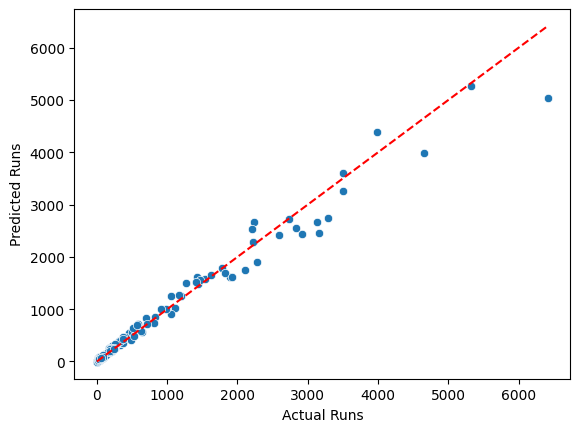

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

actual_runs=y_test2
predicted_runs=y_predlr

sns.scatterplot(x=actual_runs, y=predicted_runs)
plt.plot([min(actual_runs), max(actual_runs)], [min(actual_runs), max(actual_runs)], color='red', linestyle='--')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')


In [ ]:
import pickle as pkl
with open('/content/drive/MyDrive/model_runs.pkl','wb') as f:
  pkl.dump(runs_lr,f)

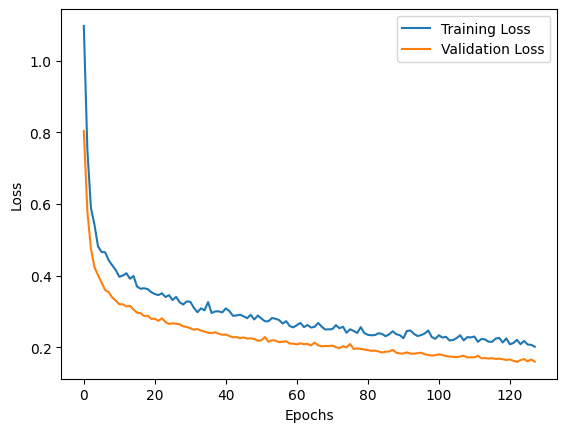

In [ ]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


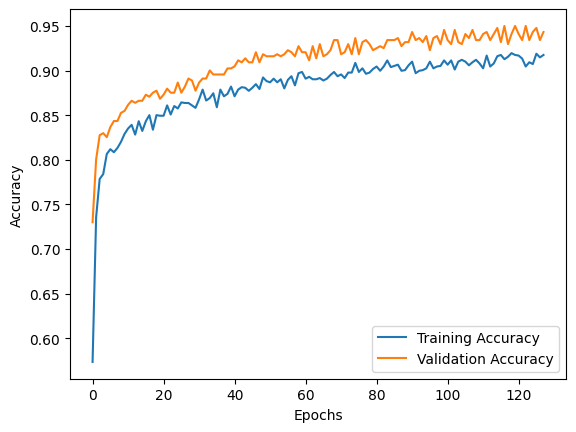

In [ ]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
plt.plot(accuracy,label='Training Accuracy')
plt.plot(val_accuracy,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict
y_pred_prob = model.predict(X_test1)
y_pred = np.argmax(y_pred_prob, axis=1)

# Report
print(classification_report(y_test1, y_pred, target_names=le1.classes_))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

 All rounder       0.98      0.99      0.99       106
     Batsman       0.96      0.86      0.90       105
      Bowler       0.94      0.96      0.95       118
       Other       0.93      0.99      0.96       112

    accuracy                           0.95       441
   macro avg       0.95      0.95      0.95       441
weighted avg       0.95      0.95      0.95       441



In [ ]:
import pandas as pd

new_data = pd.DataFrame({
    'player_name': [
        'Player A', 'Player B', 'Player C', 'Player D', 'Player E',
        'Player F', 'Player G', 'Player H', 'Player I', 'Player J',
    ],
    'runs': [1200, 350, 540, 200, 1800, 700, 230, 900, 50, 50],
    'balls_faced': [1000, 400, 600, 180, 1500, 650, 90, 800, 120, 35],
    'batting_avg': [45.6, 22.0, 30.0, 25.0, 50.0, 35.5, 18.0, 40.0, 5.0, 12.0],
    'strike_rate': [130.0, 90.5, 120.0, 105.0, 145.0, 125.0, 85.0, 110.0, 50.0, 70.0],
    'balls_bowled': [0, 500, 300, 1000, 0, 200, 600, 50, 300, 450],
    'economy': [0.0, 6.5, 7.8, 5.2, 0.0, 8.0, 6.9, 7.2, 7.0, 6.8],
    'bowling_avg': [0.0, 25.0, 30.0, 18.5, 0.0, 40.0, 22.0, 36.0, 27.0, 26.5],
    'wickets': [0, 35, 18, 55, 0, 12, 40, 5, 30, 30]
})


In [ ]:
new_data

,player_name,runs,balls_faced,batting_avg,strike_rate,balls_bowled,economy,bowling_avg,wickets
0,Player A,1200,1000,45.6,130.0,0,0.0,0.0,0
1,Player B,350,400,22.0,90.5,500,6.5,25.0,35
2,Player C,540,600,30.0,120.0,300,7.8,30.0,18
3,Player D,200,180,25.0,105.0,1000,5.2,18.5,55
4,Player E,1800,1500,50.0,145.0,0,0.0,0.0,0
5,Player F,700,650,35.5,125.0,200,8.0,40.0,12
6,Player G,230,90,18.0,85.0,600,6.9,22.0,40
7,Player H,900,800,40.0,110.0,50,7.2,36.0,5
8,Player I,50,120,5.0,50.0,300,7.0,27.0,30
9,Player J,50,35,12.0,70.0,450,6.8,26.5,30


In [ ]:
X_new=new_data[features1.columns]
X_new.replace([np.inf,-np.inf],np.nan,inplace=True)
X_new.fillna(0,inplace=True)
X_new=scaler1.transform(X_new)
pred_probs=model.predict(X_new)
predicted_roles=pred_probs.argmax(axis=1)
new_data['predicted_role']=le1.inverse_transform(predicted_roles)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


<ipython-input-19-548a22084d76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.replace([np.inf,-np.inf],np.nan,inplace=True)
<ipython-input-19-548a22084d76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.fillna(0,inplace=True)


In [ ]:
new_data

,player_name,runs,balls_faced,batting_avg,strike_rate,balls_bowled,economy,bowling_avg,wickets,predicted_role
0,Player A,1200,1000,45.6,130.0,0,0.0,0.0,0,Batsman
1,Player B,350,400,22.0,90.5,500,6.5,25.0,35,All rounder
2,Player C,540,600,30.0,120.0,300,7.8,30.0,18,Batsman
3,Player D,200,180,25.0,105.0,1000,5.2,18.5,55,All rounder
4,Player E,1800,1500,50.0,145.0,0,0.0,0.0,0,Batsman
5,Player F,700,650,35.5,125.0,200,8.0,40.0,12,Batsman
6,Player G,230,90,18.0,85.0,600,6.9,22.0,40,Bowler
7,Player H,900,800,40.0,110.0,50,7.2,36.0,5,Batsman
8,Player I,50,120,5.0,50.0,300,7.0,27.0,30,Bowler
9,Player J,50,35,12.0,70.0,450,6.8,26.5,30,Bowler


In [ ]:
model.save("model_role.keras")  # or .h5

In [ ]:
new_data

,player_name,runs,balls_faced,batting_avg,strike_rate,balls_bowled,economy,bowling_avg,wickets,predicted_batting_avg,predicted_runs
0,Player A,1200,1000,45.6,130.0,0,0.0,0.0,0,44.728573,1475.923514
1,Player B,350,400,22.0,90.5,500,6.5,25.0,35,22.094590,329.859883
2,Player C,540,600,30.0,120.0,300,7.8,30.0,18,29.555381,646.946049
3,Player D,200,180,25.0,105.0,1000,5.2,18.5,55,24.616828,235.115613
4,Player E,1800,1500,50.0,145.0,0,0.0,0.0,0,44.927251,1813.529318
5,Player F,700,650,35.5,125.0,200,8.0,40.0,12,36.150296,773.008021
6,Player G,230,90,18.0,85.0,600,6.9,22.0,40,17.717236,220.852537
7,Player H,900,800,40.0,110.0,50,7.2,36.0,5,42.520496,1207.976691
8,Player I,50,120,5.0,50.0,300,7.0,27.0,30,4.903153,44.875799
9,Player J,50,35,12.0,70.0,450,6.8,26.5,30,11.976029,43.549608


In [ ]:
X_new=new_data[features2.columns]
X_new.replace([np.inf,-np.inf],np.nan,inplace=True)
X_new.fillna(0,inplace=True)
X_new=scaler2.transform(X_new)
pred_runs=gbr.predict(X_new)
# Assign the continuous numerical predictions directly
new_data['predicted_runs']=pred_runs

<ipython-input-55-ab672918c59d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.replace([np.inf,-np.inf],np.nan,inplace=True)
<ipython-input-55-ab672918c59d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.fillna(0,inplace=True)


In [ ]:
X_new=new_data[features3.columns]
X_new.replace([np.inf,-np.inf],np.nan,inplace=True)
X_new.fillna(0,inplace=True)
X_new=scaler3.transform(X_new)
pred_batting_avg=gbr.predict(X_new)
# Assign the continuous numerical predictions directly
new_data['predicted_batting_avg']=pred_batting_avg

<ipython-input-41-e2e6001143e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.replace([np.inf,-np.inf],np.nan,inplace=True)
<ipython-input-41-e2e6001143e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.fillna(0,inplace=True)


In [ ]:
import pandas as pd

mock_data = pd.DataFrame({
    'player_name': [
        'Player A', 'Player B', 'Player C', 'Player D', 'Player E',
        'Player F', 'Player G', 'Player H', 'Player I', 'Player J',
        'Player K', 'Player L', 'Player M', 'Player N', 'Player O',
        'Player P', 'Player Q', 'Player R', 'Player S', 'Player T'
    ],
    'runs': [
        1200, 350, 540, 200, 1800, 700, 130, 900, 50, 50,
        630, 1100, 400, 310, 175, 800, 50, 30, 70, 100
    ],
    'balls_faced': [
        1000, 400, 600, 180, 1500, 650, 90, 800, 120, 35,
        340, 670, 380, 290, 130, 600, 50, 30, 40, 90
    ],
    'batting_avg': [
        45.6, 22.0, 30.0, 25.0, 50.0, 35.5, 18.0, 40.0, 5.0, 12.0,
        35.0, 65.0, 28.5, 30.2, 17.3, 36.4, 6.0, 3.5, 8.0, 10.2
    ],
    'strike_rate': [
        130.0, 90.5, 120.0, 105.0, 145.0, 125.0, 85.0, 110.0, 50.0, 70.0,
        125.0, 140.0, 98.0, 100.0, 72.0, 122.5, 55.0, 40.0, 60.0, 80.0
    ],
    'balls_bowled': [
        0, 500, 300, 1000, 0, 200, 600, 50, 300, 450,
        100, 80, 250, 350, 100, 400, 420, 380, 100, 180
    ],
    'economy': [
        0.0, 6.5, 7.8, 5.2, 0.0, 8.0, 6.9, 7.2, 7.0, 6.8,
        7.4, 7.9, 6.0, 6.5, 7.3, 5.5, 6.2, 6.0, 6.9, 6.7
    ],
    'bowling_avg': [
        0.0, 25.0, 30.0, 18.5, 0.0, 40.0, 22.0, 36.0, 27.0, 26.5,
        33.0, 31.5, 29.0, 28.0, 32.0, 21.0, 23.0, 24.0, 35.0, 30.5
    ],
    'wickets': [
        0, 35, 18, 55, 0, 12, 40, 5, 30, 30,
        10, 8, 15, 22, 12, 38, 34, 30, 18, 20
    ]
})
mock_data.to_csv('mock_data.csv', index=False)

In [ ]:
!pip install gradio

In [ ]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle as pkl
import gradio as gr
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# Load models and preprocessors
role_prediction_model = tf.keras.models.load_model('/content/drive/MyDrive/model_role.keras')
role_prediction_le = pkl.load(open('/content/drive/MyDrive/le_role_prediction.pkl', 'rb'))
role_prediction_scale = pkl.load(open('/content/drive/MyDrive/scaler_role_prediction.pkl', 'rb'))

run_prediction_model = pkl.load(open('/content/drive/MyDrive/model_runs.pkl', 'rb'))
run_prediction_scale = pkl.load(open('/content/drive/MyDrive/scaler_runs.pkl', 'rb'))

batting_avg_prediction_model = pkl.load(open('/content/drive/MyDrive/model_batting_avg.pkl', 'rb'))
batting_avg_prediction_scale = pkl.load(open('/content/drive/MyDrive/scaler_batting_avg.pkl', 'rb'))

bowling_avg_model = pkl.load(open('/content/drive/MyDrive/model_bowling_avg.pkl','rb'))
bowling_avg_scale = pkl.load(open('/content/drive/MyDrive/scaler_bowling_avg.pkl','rb'))

economy_model = pkl.load(open('/content/drive/MyDrive/model_economy.pkl','rb'))
economy_scale = pkl.load(open('/content/drive/MyDrive/scaler_economy.pkl','rb'))

# Global data store
upload_df = {}

# Main Dashboard Class
class Cricket_Dashboard:
    def __init__(self, data):
        self.data = data.copy()

    def role_prediction(self):
        features = ['runs', 'balls_faced', 'batting_avg', 'strike_rate',
                    'balls_bowled', 'economy', 'bowling_avg', 'wickets']
        player_data = self.data[features].apply(pd.to_numeric, errors='coerce')
        player_data.replace([np.inf, -np.inf], np.nan, inplace=True)
        player_data.fillna(0, inplace=True)
        scaled_data = role_prediction_scale.transform(player_data)
        predictions = role_prediction_model.predict(scaled_data)
        predicted_roles = predictions.argmax(axis=1)
        self.data['predicted_role'] = role_prediction_le.inverse_transform(predicted_roles)
        return self.data

    def playerperformance(self, player_name):
        if 'predicted_role' not in self.data.columns:
            self.role_prediction()
        player = self.data[self.data['player_name'] == player_name]

        if player.empty:
            return {"Error": "Player not found."}

        avg_feat = player[['runs', 'balls_faced', 'batting_avg']]
        avg_scaled = batting_avg_prediction_scale.transform(avg_feat)
        avg_pred = batting_avg_prediction_model.predict(avg_scaled)[0]

        run_feat = player[['runs', 'balls_faced', 'batting_avg', 'strike_rate']]
        run_scaled = run_prediction_scale.transform(run_feat)
        run_pred = run_prediction_model.predict(run_scaled)[0]

        bowling_avg_feat = player[['wickets', 'balls_bowled', 'bowling_avg']]
        bowling_avg_scaled = bowling_avg_scale.transform(bowling_avg_feat)
        bowling_avg_pred = bowling_avg_model.predict(bowling_avg_scaled)[0]

        economy_feat = player[['wickets', 'balls_bowled', 'economy']]
        economy_scaled = economy_scale.transform(economy_feat)
        economy_pred = economy_model.predict(economy_scaled)[0]

        return {
            "Player Name": player_name,
            "Predicted Role": player['predicted_role'].values[0],
            "Predicted Runs": round(run_pred, 2),
            "Predicted Batting Average": round(avg_pred, 2),
            "Predicted Bowling Average": round(bowling_avg_pred, 2),
            "Predicted Economy": round(economy_pred, 2)
        }

    def smart_xi(self):
        if 'predicted_role' not in self.data.columns:
            self.role_prediction()

        self.data['performance'] = (
            self.data['runs'] * 0.5 +
            self.data['wickets'] * 20 -
            self.data['economy'] * 5 +
            self.data['batting_avg'] * 2 +
            self.data['strike_rate'] +
            self.data['bowling_avg']
        )
        role_counts = {'Batsman': 4, 'Bowler': 4, 'All rounder': 3}
        selected_players = []

        for role, count in role_counts.items():
            role_df = self.data[self.data['predicted_role'] == role]
            if not role_df.empty:
                top = role_df.nlargest(count, 'performance')
                selected_players.append(top)

        final_xi = pd.concat(selected_players).head(11).reset_index(drop=True)
        return final_xi
    def simulate_time_series(self,player_name,n_matches=10):
        if 'predicted_role' not in self.data.columns:
            self.role_prediction()
        player = self.data[self.data['player_name'] == player_name]

        if player.empty:
            return {"Error": "Player not found."}
        base=player[['runs','balls_faced','batting_avg','strike_rate']]
        base_scaled=run_prediction_scale.transform(base)
        preds=[]
        for i in range(n_matches):
            noise=np.random.normal(0,0.05,size=base_scaled.shape)
            pred=run_prediction_model.predict(base_scaled+noise)[0]
            preds.append(round(pred,2))
        df_sim=pd.DataFrame({
                'Match':[f'Match {i+1}' for i in range(n_matches)],
                'Predicted Runs':preds

        })
        fig,ax=plt.subplots(figsize=(10,5))
        sns.lineplot(data=df_sim,x='Match',y='Predicted Runs',marker='o',ax=ax)
        ax.set_title(f'Simulated Performance of {player_name} Over {n_matches} Matches')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.close(fig)
        return df_sim,fig
# --- Gradio Interface Setup ---
def load_csv_file(file):
    df = pd.read_csv(file.name)
    predictor = Cricket_Dashboard(df)
    predicted_df = predictor.role_prediction()
    upload_df['data'] = predicted_df

    choices = predicted_df['player_name'].dropna().unique().tolist()

    return (
            gr.update(choices=choices, visible=True),
            gr.update(visible=True),
            gr.update(visible=True),
            predicted_df[['player_name', 'runs', 'balls_faced', 'batting_avg', 'strike_rate',
                          'balls_bowled', 'economy', 'bowling_avg', 'wickets', 'predicted_role']],
            gr.update(choices=choices, visible=True),
            gr.update(choices=choices, visible=True),
            gr.update(visible=True),
            gr.update(choices=choices,visible=True),
            gr.update(visible=True)

            )

def simulate_time_series(player_name):
  predictor=Cricket_Dashboard(upload_df['data'])
  result=predictor.simulate_time_series(player_name)
  return result
def predict_player(player_name):
    predictor = Cricket_Dashboard(upload_df['data'])
    result = predictor.playerperformance(player_name)
    df_result= pd.DataFrame([result])

    fig,ax=plt.subplots(figsize=(10,5))
    metrics=['Predicted Runs','Predicted Batting Average','Predicted Bowling Average','Predicted Economy']
    values=[result[m] for m in metrics]
    ax.bar(metrics,values, color='blue')
    ax.set_title(f'Predicted Performance Metrics:{player_name}')
    ax.set_ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.close(fig)

    return df_result,fig

def compare_players(player1,player2):
  predictor=Cricket_Dashboard(upload_df['data'])
  player1_stats=predictor.playerperformance(player1)
  player2_stats=predictor.playerperformance(player2)
  df_result=pd.DataFrame([player1_stats,player2_stats])

  fig,ax=plt.subplots(figsize=(10,5))
  metrics=['Predicted Runs','Predicted Batting Average','Predicted Bowling Average','Predicted Economy']
  index=np.arange(len(metrics))
  bar_width=0.35
  values1=[player1_stats[m] for m in metrics]
  values2=[player2_stats[m] for m in metrics]
  ax.bar(index,values1,bar_width,color='green',label=player1)
  ax.bar(index+bar_width,values2,bar_width,color='orange',label=player2)
  ax.set_xticks(index + bar_width / 2)
  ax.set_xticklabels(metrics, rotation=45)
  ax.set_ylabel("Value")
  ax.set_title("Player Comparison")
  ax.legend()
  plt.tight_layout()
  plt.close(fig)

  return df_result,fig

def get_smart_xi():
    predictor = Cricket_Dashboard(upload_df['data'])
    final_xi = predictor.smart_xi()
    return final_xi

with gr.Blocks() as app:
    gr.Markdown("# 🏏 Smart Cricket Predictor")

    file_input = gr.File(label="Upload Player CSV")
    player_dropdown = gr.Dropdown(label="Select Player", visible=False)
    predict_btn = gr.Button("🔮 Predict Player", visible=False)
    xi_btn = gr.Button("⚡ Smart XI", visible=False)
    player_table = gr.Dataframe(label="📋 Players with Predicted Roles & Stats")  # 👈 Added
    player_1 = gr.Dropdown(label="Select Player 1", visible=False)
    player_2 = gr.Dropdown(label="Select Player 2", visible=False)
    compare_btn = gr.Button("🔍 Compare Players", visible=False)
    output_df = gr.Dataframe(label="🔍 Results")
    output_fig = gr.Plot(label="📊 Performance Metrics")
    timeseries_df = gr.Dataframe(label="🕒 Simulated Series")
    timeseries_fig = gr.Plot(label="📈 Time-Series Plot")

    file_input.change(fn=load_csv_file, inputs=file_input,outputs=[player_dropdown, predict_btn, xi_btn, player_table,player_1,player_2,compare_btn,timeseries_player,timeseries_btn])
    compare_btn.click(fn=compare_players, inputs=[player_1,player_2], outputs=[output_df,output_fig])
    player_dropdown.change(fn=predict_player, inputs=player_dropdown, outputs=[output_df,output_fig])
    predict_btn.click(fn=timeseries_fig, inputs=player_dropdown, outputs=[output_df,output_fig])
    xi_btn.click(fn=get_smart_xi, outputs=output_df)

app.launch(share=True, debug=True, inline=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d58a89cf9b59db8b1e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d58a89cf9b59db8b1e.gradio.live


In [ ]:
# Load models and preprocessors
import pickle as pkl
import gradio as gr
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# Load models and preprocessors
role_prediction_model = tf.keras.models.load_model('/content/drive/MyDrive/model_role.keras')
role_prediction_le = pkl.load(open('/content/drive/MyDrive/le_role_prediction.pkl', 'rb'))
role_prediction_scale = pkl.load(open('/content/drive/MyDrive/scaler_role_prediction.pkl', 'rb'))

run_prediction_model = pkl.load(open('/content/drive/MyDrive/model_runs.pkl', 'rb'))
run_prediction_scale = pkl.load(open('/content/drive/MyDrive/scaler_runs.pkl', 'rb'))

batting_avg_prediction_model = pkl.load(open('/content/drive/MyDrive/model_batting_avg.pkl', 'rb'))
batting_avg_prediction_scale = pkl.load(open('/content/drive/MyDrive/scaler_batting_avg.pkl', 'rb'))

bowling_avg_model = pkl.load(open('/content/drive/MyDrive/model_bowling_avg.pkl','rb'))
bowling_avg_scale = pkl.load(open('/content/drive/MyDrive/scaler_bowling_avg.pkl','rb'))

economy_model = pkl.load(open('/content/drive/MyDrive/model_economy.pkl','rb'))
economy_scale = pkl.load(open('/content/drive/MyDrive/scaler_economy.pkl','rb'))

# Global data store
upload_df = {}

class Cricket_Dashboard:
    def __init__(self, data):
        self.data = data.copy()

    def role_prediction(self):
        features = ['runs', 'balls_faced', 'batting_avg', 'strike_rate',
                    'balls_bowled', 'economy', 'bowling_avg', 'wickets']
        player_data = self.data[features].apply(pd.to_numeric, errors='coerce')
        player_data.replace([np.inf, -np.inf], np.nan, inplace=True)
        player_data.fillna(0, inplace=True)
        scaled_data = role_prediction_scale.transform(player_data)
        predictions = role_prediction_model.predict(scaled_data)
        predicted_roles = predictions.argmax(axis=1)
        self.data['predicted_role'] = role_prediction_le.inverse_transform(predicted_roles)
        return self.data

    def playerperformance(self, player_name):
        if 'predicted_role' not in self.data.columns:
            self.role_prediction()
        player = self.data[self.data['player_name'] == player_name]

        if player.empty:
            return {"Error": "Player not found."}

        avg_feat = player[['runs', 'balls_faced', 'batting_avg']]
        avg_scaled = batting_avg_prediction_scale.transform(avg_feat)
        avg_pred = batting_avg_prediction_model.predict(avg_scaled)[0]

        run_feat = player[['runs', 'balls_faced', 'batting_avg', 'strike_rate']]
        run_scaled = run_prediction_scale.transform(run_feat)
        run_pred = run_prediction_model.predict(run_scaled)[0]

        bowling_avg_feat = player[['wickets', 'balls_bowled', 'bowling_avg']]
        bowling_avg_scaled = bowling_avg_scale.transform(bowling_avg_feat)
        bowling_avg_pred = bowling_avg_model.predict(bowling_avg_scaled)[0]

        economy_feat = player[['wickets', 'balls_bowled', 'economy']]
        economy_scaled = economy_scale.transform(economy_feat)
        economy_pred = economy_model.predict(economy_scaled)[0]

        return {
            "Player Name": player_name,
            "Predicted Role": player['predicted_role'].values[0],
            "Predicted Runs": round(run_pred, 2),
            "Predicted Batting Average": round(avg_pred, 2),
            "Predicted Bowling Average": round(bowling_avg_pred, 2),
            "Predicted Economy": round(economy_pred, 2)
        }

    def smart_xi(self):
        if 'predicted_role' not in self.data.columns:
            self.role_prediction()

        self.data['performance'] = (
            self.data['runs'] * 0.5 +
            self.data['wickets'] * 20 -
            self.data['economy'] * 5 +
            self.data['batting_avg'] * 2 +
            self.data['strike_rate'] +
            self.data['bowling_avg']
        )
        role_counts = {'Batsman': 4, 'Bowler': 4, 'All rounder': 3}
        selected_players = []

        for role, count in role_counts.items():
            role_df = self.data[self.data['predicted_role'] == role]
            if not role_df.empty:
                top = role_df.nlargest(count, 'performance')
                selected_players.append(top)

        final_xi = pd.concat(selected_players).head(11).reset_index(drop=True)
        return final_xi

    def simulate_time_series(self, player_name, n_matches=10):
        if 'predicted_role' not in self.data.columns:
            self.role_prediction()
        player = self.data[self.data['player_name'] == player_name]

        if player.empty:
            return {"Error": "Player not found."}
        base = player[['runs','balls_faced','batting_avg','strike_rate']]
        base_scaled = run_prediction_scale.transform(base)
        preds = []
        for i in range(n_matches):
            noise = np.random.normal(0, 0.05, size=base_scaled.shape)
            pred = run_prediction_model.predict(base_scaled + noise)[0]
            preds.append(round(pred, 2))
        df_sim = pd.DataFrame({
            'Match': [f'Match {i+1}' for i in range(n_matches)],
            'Predicted Runs': preds
        })
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.lineplot(data=df_sim, x='Match', y='Predicted Runs', marker='o', ax=ax)
        ax.set_title(f'Simulated Performance of {player_name} Over {n_matches} Matches')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.close(fig)
        return df_sim, fig

# Gradio UI

def load_csv_file(file):
    df = pd.read_csv(file.name)
    predictor = Cricket_Dashboard(df)
    predicted_df = predictor.role_prediction()
    upload_df['data'] = predicted_df
    choices = predicted_df['player_name'].dropna().unique().tolist()
    return gr.update(choices=choices, visible=True), gr.update(visible=True), gr.update(visible=True), gr.update(visible=True), predicted_df

def predict_player(player_list):
    player_name = player_list[0]  # Take only the first selected player
    predictor = Cricket_Dashboard(upload_df['data'])
    stats = predictor.playerperformance(player_name)
    df_result = pd.DataFrame([stats])
    fig, ax = plt.subplots(figsize=(10, 5))
    metrics = ['Predicted Runs', 'Predicted Batting Average', 'Predicted Bowling Average', 'Predicted Economy']
    values = [stats[m] for m in metrics]
    ax.bar(metrics, values, color='blue')
    ax.set_title(f'Performance of {player_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.close(fig)
    return df_result, fig

def compare_players(player):
    predictor = Cricket_Dashboard(upload_df['data'])
    player1_stats = predictor.playerperformance(player[0])
    player2_stats = predictor.playerperformance(player[1])
    df_result = pd.DataFrame([player1_stats, player2_stats])
    fig, ax = plt.subplots(figsize=(10, 5))
    metrics = ['Predicted Runs','Predicted Batting Average','Predicted Bowling Average','Predicted Economy']
    index = np.arange(len(metrics))
    width = 0.35
    ax.bar(index, [player1_stats[m] for m in metrics], width, label=player[0], color='green')
    ax.bar(index+width, [player2_stats[m] for m in metrics], width, label=player[1], color='orange')
    ax.set_xticks(index + width/2)
    ax.set_xticklabels(metrics, rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.close(fig)
    return df_result, fig

def simulate_series(player_list):
    player_name = player_list[0]  # Take only the first selected player
    predictor = Cricket_Dashboard(upload_df['data'])
    return predictor.simulate_time_series(player_name)

def get_smart_xi():
    predictor = Cricket_Dashboard(upload_df['data'])
    return predictor.smart_xi()

with gr.Blocks() as app:
    gr.Markdown("# 🏏 Smart Cricket Predictor")
    file_input = gr.File()
    player_dropdown = gr.Dropdown(label="Select Player", visible=False, multiselect=True)
    predict_btn = gr.Button("Predict Player", visible=False)
    compare_btn = gr.Button("Compare Players", visible=False)
    timeseries_btn = gr.Button("Simulate Time-Series", visible=False)
    xi_btn = gr.Button("Smart XI", visible=False)
    output_df = gr.Dataframe()
    output_fig = gr.Plot()
    player_table = gr.Dataframe()
    timeseries_df = gr.Dataframe()
    timeseries_fig = gr.Plot()

    file_input.change(load_csv_file, inputs=file_input,
                      outputs=[player_dropdown, predict_btn, compare_btn, timeseries_btn, player_table])
    predict_btn.click(predict_player, inputs=player_dropdown, outputs=[output_df, output_fig])
    compare_btn.click(compare_players, inputs=player_dropdown, outputs=[output_df, output_fig])
    timeseries_btn.click(simulate_series, inputs=player_dropdown, outputs=[timeseries_df, timeseries_fig])
    xi_btn.click(get_smart_xi, outputs=output_df)

if __name__ == '__main__':
    app.launch(share=True, debug=True, inline=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://2b1b1f9da7403c71bc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://2b1b1f9da7403c71bc.gradio.live
